In [ ]:
!gdown 1e_4b50D9JezOPpZOOnYYiCfrEcKNuVOb

Downloading...
From: https://drive.google.com/uc?id=1e_4b50D9JezOPpZOOnYYiCfrEcKNuVOb
To: /content/PROSTATE-DIAGNOSIS_DICOM_images.zip
100% 213M/213M [00:01<00:00, 149MB/s]


In [ ]:
!unzip /content/PROSTATE-DIAGNOSIS_DICOM_images.zip

In [ ]:
!pip install pydicom

     |████████████████████████████████| 2.0 MB 11.3 MB/s 


In [ ]:
import pydicom
import os
import numpy as np
from PIL import Image

In [ ]:
def reach_dcm_files(dcmpath):
    dcm_files_names = []
    for dcmr, dcmfolders, dcmfiles in os.walk(dcmpath):
        for dcmfile in dcmfiles:
            _, ext = os.path.splitext(dcmfile)
            if ext in ['.dcm']:
                dcm_files_names.append(dcmfile)

    return dcm_files_names

In [ ]:
def dcm_to_png_converting(directory, dcm_files_name):

    dcm_to_png = pydicom.dcmread(directory + dcm_files_name)

    dcm_to_png = dcm_to_png.pixel_array.astype(float)

    dcm_to_png_rescale = (np.maximum(dcm_to_png,0)/dcm_to_png.max())*255 # float pixels
    png_image = np.uint8(dcm_to_png_rescale) # integers pixels

    png_image = Image.fromarray(png_image)

    return png_image

In [ ]:
def delete_old_files(directory):
	reach_dir = os.listdir(directory)
	old_files = [oldfile for oldfile in reach_dir if oldfile.endswith(".dcm")]
	for oldfile in old_files:
		path_to_file = os.path.join(directory, oldfile)
		os.remove(path_to_file)

In [ ]:
dcm_files_names = reach_dcm_files('/content/PROSTATE-DIAGNOSIS_DICOM_images/No_Surgery/')
for dcm_files_name in dcm_files_names:
    png_image = dcm_to_png_converting('/content/PROSTATE-DIAGNOSIS_DICOM_images/No_Surgery/', dcm_files_name)
    os.chdir('/content/PROSTATE-DIAGNOSIS_DICOM_images/No_Surgery')
    png_image.save(dcm_files_name+'.png')

In [ ]:
directory = '/content/PROSTATE-DIAGNOSIS_DICOM_images/No_Surgery'

delete_old_files(directory)

In [ ]:
dcm_files_names = reach_dcm_files('/content/PROSTATE-DIAGNOSIS_DICOM_images/Surgery/')
for dcm_files_name in dcm_files_names:
    png_image = dcm_to_png_converting('/content/PROSTATE-DIAGNOSIS_DICOM_images/Surgery/', dcm_files_name)
    os.chdir('/content/PROSTATE-DIAGNOSIS_DICOM_images/Surgery/')
    png_image.save(dcm_files_name+'.png')

In [ ]:
directory = '/content/PROSTATE-DIAGNOSIS_DICOM_images/Surgery'

delete_old_files(directory)

In [ ]:
os.chdir('/content/')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import shutil
import math
import imutils

In [ ]:
# count the number of images in the respective classes

prostate_diagnosis_images = "/content/PROSTATE-DIAGNOSIS_DICOM_images"
image_counter = {}
for pngimagedir in os.listdir(prostate_diagnosis_images):
  image_counter[pngimagedir] = len(os.listdir(os.path.join(prostate_diagnosis_images, pngimagedir)))

In [ ]:
print('There are,', image_counter, 'in this dataset')

There are, {'No_Surgery': 893, 'Surgery': 550} in this dataset


In [ ]:
# we create a training folder

if not os.path.exists("./PDTrain"):
  os.mkdir("./PDTrain")
  for pngimagedir in os.listdir(prostate_diagnosis_images):
    os.makedirs("./PDTrain/"+pngimagedir)
    for mri_images in np.random.choice(a=os.listdir(os.path.join(prostate_diagnosis_images, pngimagedir) ) , size= (math.floor(70/100*image_counter[pngimagedir])-5) , replace=False ):
      old_dir = os.path.join(prostate_diagnosis_images,pngimagedir,mri_images)
      new_dir = os.path.join('./PDTrain', pngimagedir)
      shutil.copy(old_dir,new_dir)
      os.remove(old_dir)
else:
  print("PDTrain already created")

In [ ]:
# we create a Validation folder

if not os.path.exists("./PDValidation"):
  os.mkdir("./PDValidation")
  for pngimagedir in os.listdir(prostate_diagnosis_images):
    os.makedirs("./PDValidation/"+pngimagedir)
    for mri_images in np.random.choice(a=os.listdir(os.path.join(prostate_diagnosis_images, pngimagedir) ) , size= (math.floor(15/100*image_counter[pngimagedir])-5) , replace=False ):
      old_dir = os.path.join(prostate_diagnosis_images,pngimagedir,mri_images)
      new_dir = os.path.join('./PDValidation', pngimagedir)
      shutil.copy(old_dir,new_dir)
      os.remove(old_dir)
else:
  print("PDValidation already created")

In [ ]:
# we create a test folder

if not os.path.exists("./PDTest"):
  os.mkdir("./PDTest")
  for pngimagedir in os.listdir(prostate_diagnosis_images):
    os.makedirs("./PDTest/"+pngimagedir)
    for mri_images in np.random.choice(a=os.listdir(os.path.join(prostate_diagnosis_images, pngimagedir) ) , size= (math.floor(15/100*image_counter[pngimagedir])-5) , replace=False ):
      old_dir = os.path.join(prostate_diagnosis_images,pngimagedir,mri_images)
      new_dir = os.path.join('./PDTest', pngimagedir)
      shutil.copy(old_dir,new_dir)
      os.remove(old_dir)
else:
  print("PDTest already created")

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import keras

In [ ]:
base_mobilenet = MobileNet(input_shape=(224,224,3),include_top=False)

for layer in base_mobilenet.layers:
  layer.trainable = False

adddional_layer = Flatten()(base_mobilenet.output)
adddional_layer = Dense(units=2 , activation='sigmoid', name = 'predictions' )(adddional_layer)

# creating our model.
mobilenet_model = Model(base_mobilenet.input, adddional_layer)
mobilenet_model.summary()
mobilenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']  )

In [ ]:
resnet_base_model=ResNet50(input_shape=(224,224,3),include_top=False)

for layer in resnet_base_model.layers:
  layer.trainable = False

adddional_layer = Flatten()(resnet_base_model.output)
adddional_layer = Dense(units=2 , activation='sigmoid', name = 'predictions' )(adddional_layer)

# creating our model.
resnet_model = Model(resnet_base_model.input, adddional_layer)
#model.summary()
resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']  )

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
xnet_base_model=Xception(weights='imagenet',include_top=False, input_shape=(224,224,3))

for layer in xnet_base_model.layers:
  layer.trainable = False

adddional_layer = Flatten()(xnet_base_model.output)
adddional_layer = Dense(units=2 , activation='sigmoid', name = 'predictions' )(adddional_layer)

# creating our model.
xnet_model = Model(xnet_base_model.input, adddional_layer)
#model.summary()
xnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']  )

83697664/83683744 [==============================] - 2s 0us/step


In [ ]:
vgg_base_model=VGG16(weights='imagenet',include_top=False, input_shape=(224,224,3))

for layer in vgg_base_model.layers:
  layer.trainable = False

adddional_layer = Flatten()(vgg_base_model.output)
adddional_layer = Dense(units=2 , activation='sigmoid', name = 'predictions' )(adddional_layer)

# creating our model.
vgg_16_model = Model(vgg_base_model.input, adddional_layer)
#model.summary()
vgg_16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']  )

58900480/58889256 [==============================] - 2s 0us/step


In [ ]:
pdtrain_gen = image.ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2 , rescale = 1./255 , horizontal_flip=True)
pdval_gen = image.ImageDataGenerator(rescale = 1./255)
pdtest_gen = image.ImageDataGenerator(rescale = 1./255)

In [ ]:
pdtrain_imgs = pdtrain_gen.flow_from_directory(directory= "/content/PDTrain", target_size=(224,224), batch_size=32,)

Found 1000 images belonging to 2 classes.


In [ ]:
pdtrain_imgs.class_indices

{'No_Surgery': 0, 'Surgery': 1}

In [ ]:
pdval_imgs = pdval_gen.flow_from_directory(directory= "/content/PDValidation", target_size=(224,224), batch_size=32,)

Found 205 images belonging to 2 classes.


In [ ]:
pdtest_imgs = pdtest_gen.flow_from_directory(directory= "/content/PDTest", target_size=(224,224), batch_size=32)

Found 205 images belonging to 2 classes.


In [ ]:
# to visualize the images in the traing data denerator

pdt_img , condition = pdtrain_imgs.next()

In [ ]:
# function when called will prot the images

def show_mri_imgs(pd_sh, condition):
  """
  input  :- images array
  output :- plots the images
  """

  for im, l in zip(pd_sh,condition) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

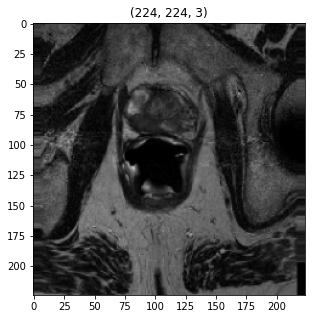

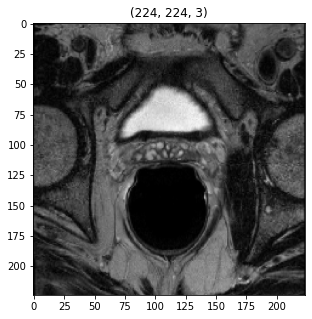

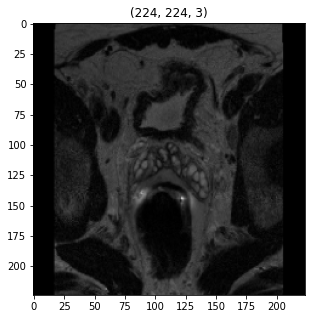

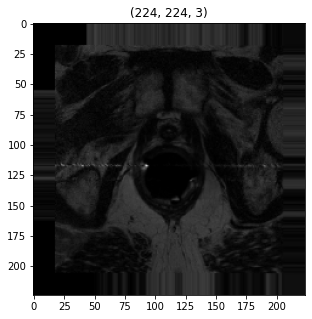

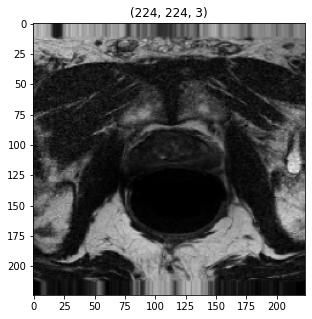

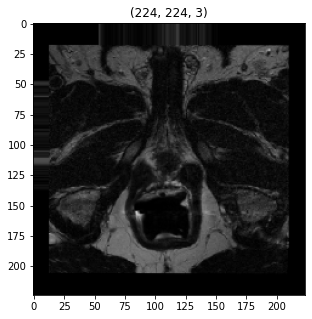

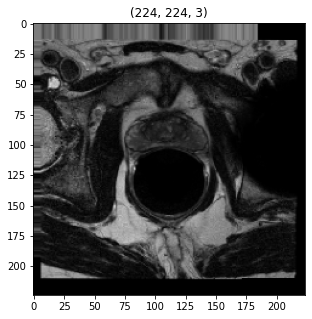

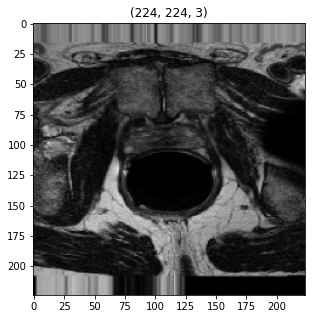

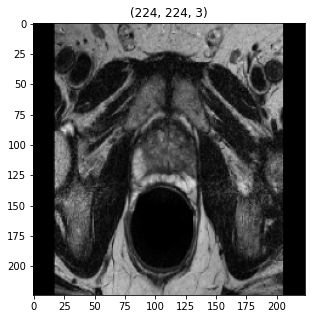

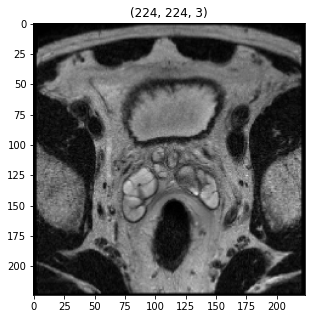

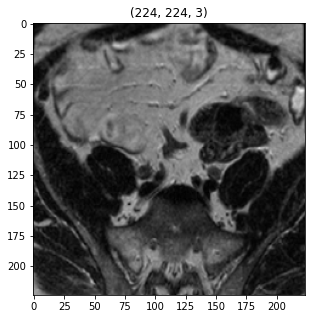

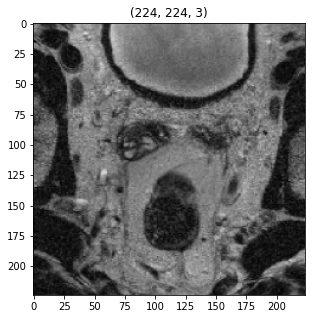

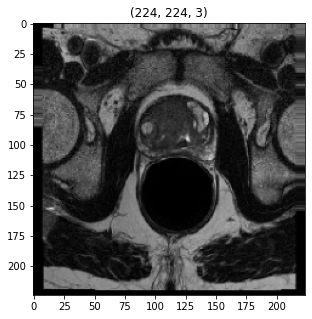

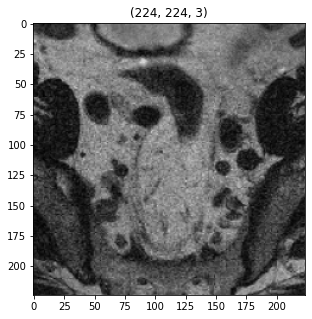

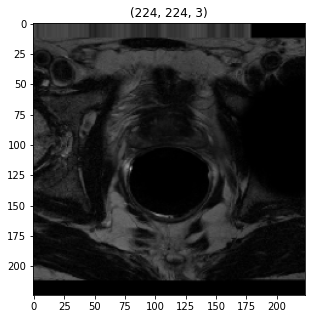

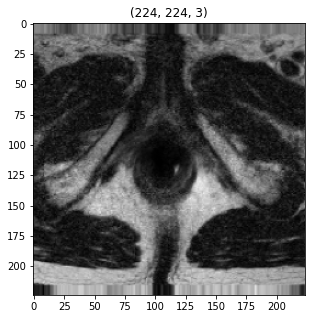

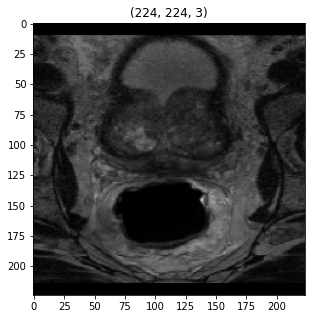

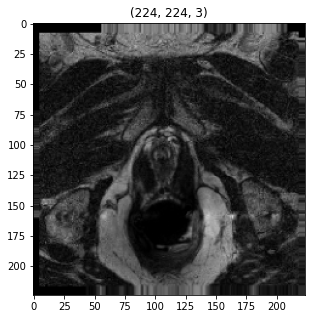

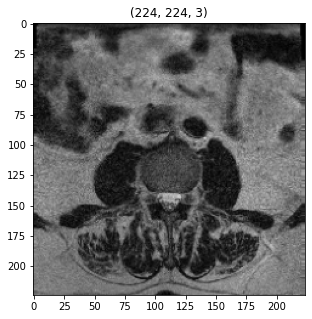

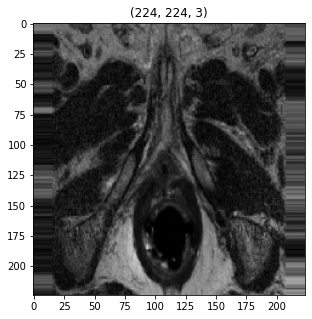

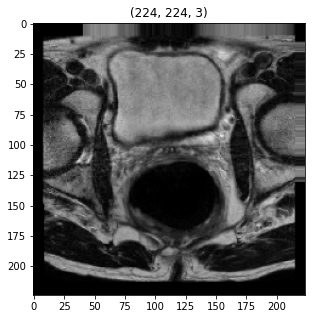

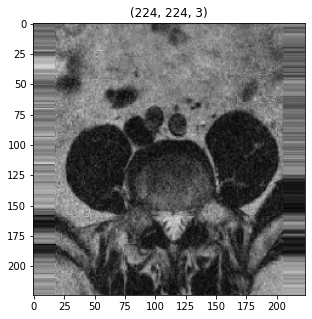

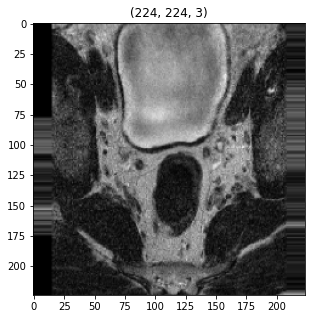

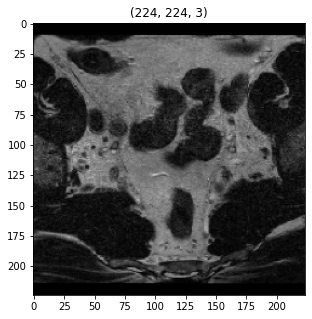

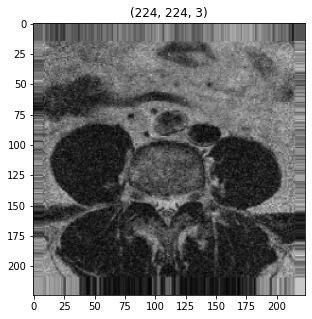

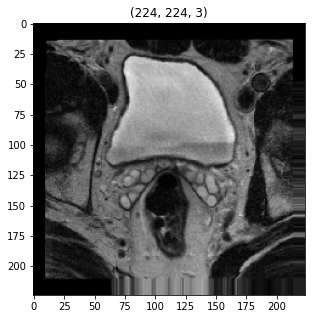

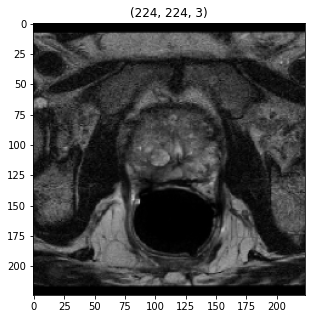

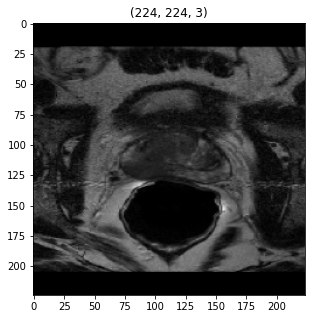

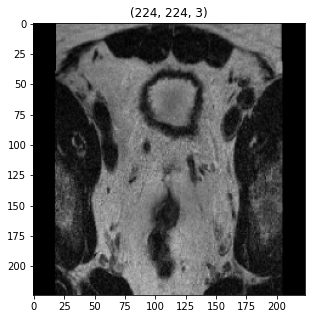

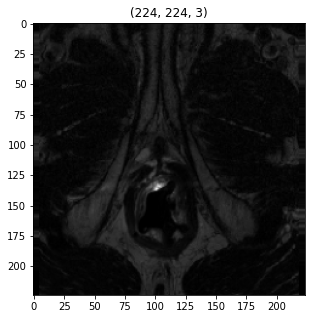

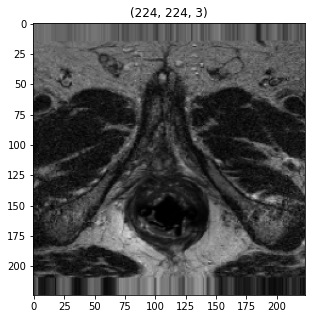

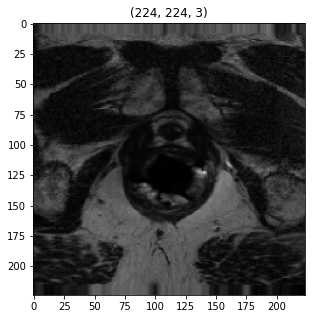

In [ ]:
# function call to plot the images

show_mri_imgs(pdt_img, condition)

In [ ]:
## having early stopping and model check point

from keras.callbacks import ModelCheckpoint

# model check point
mc = ModelCheckpoint(filepath="mobilenet_best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [mc]

In [ ]:
hist = mobilenet_model.fit_generator(pdtrain_imgs,
                           steps_per_epoch= 16,
                           epochs= 50,
                           validation_data= pdval_imgs,
                           validation_steps= 4,
                           callbacks=[mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 4.8161 - accuracy: 0.5840
Epoch 1: val_accuracy improved from -inf to 0.64062, saving model to mobilenet_best_model.h5
16/16 [==============================] - 22s 625ms/step - loss: 4.8161 - accuracy: 0.5840 - val_loss: 2.2480 - val_accuracy: 0.6406
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 1.6440 - accuracy: 0.7152
Epoch 2: val_accuracy improved from 0.64062 to 0.78906, saving model to mobilenet_best_model.h5
16/16 [==============================] - 9s 543ms/step - loss: 1.6440 - accuracy: 0.7152 - val_loss: 0.8019 - val_accuracy: 0.7891
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 0.9853 - accuracy: 0.7852
Epoch 3: val_accuracy did not improve from 0.78906
16/16 [==============================] - 9s 548ms/step - loss: 0.9853 - accuracy: 0.7852 - val_loss: 1.6408 - val_accuracy: 0.6562
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 1.1876 - accurac

In [ ]:
# Loading the best fit model
from keras.models import load_model
mobilenet_model = load_model("/content/mobilenet_best_model.h5")

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

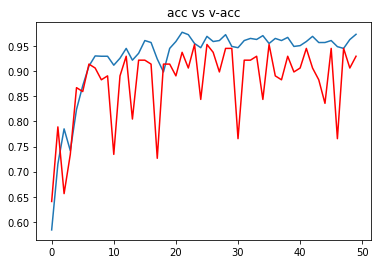

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

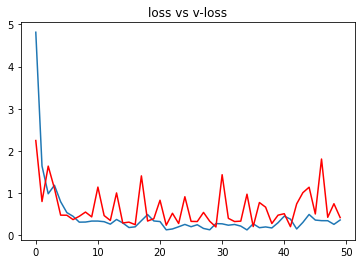

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# checking out the accurscy of our model

acc = mobilenet_model.evaluate_generator(generator= pdtest_imgs)[1]

print(f"The accuracy of your model is = {acc*100} %")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


The accuracy of your model is = 90.24389982223511 %


In [ ]:
## having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# model check point
mc = ModelCheckpoint(filepath="rest_best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [mc]

In [ ]:
hist = resnet_model.fit_generator(pdtrain_imgs,
                           steps_per_epoch= 16,
                           epochs= 50,
                           validation_data= pdval_imgs,
                           validation_steps= 4,
                           callbacks=[mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 1.7757 - accuracy: 0.5332
Epoch 1: val_accuracy improved from -inf to 0.45312, saving model to rest_best_model.h5
16/16 [==============================] - 16s 696ms/step - loss: 1.7757 - accuracy: 0.5332 - val_loss: 1.1782 - val_accuracy: 0.4531
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 0.9657 - accuracy: 0.5164
Epoch 2: val_accuracy did not improve from 0.45312
16/16 [==============================] - 10s 578ms/step - loss: 0.9657 - accuracy: 0.5164 - val_loss: 1.0287 - val_accuracy: 0.3594
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 0.7649 - accuracy: 0.5664
Epoch 3: val_accuracy improved from 0.45312 to 0.67969, saving model to rest_best_model.h5
16/16 [==============================] - 10s 640ms/step - loss: 0.7649 - accuracy: 0.5664 - val_loss: 0.6543 - val_accuracy: 0.6797
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 0.7188 - accuracy: 0.582

In [ ]:
# Loading the best fit model
from keras.models import load_model
resnetmodel = load_model("/content/rest_best_model.h5")

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

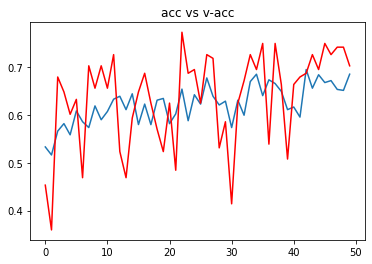

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

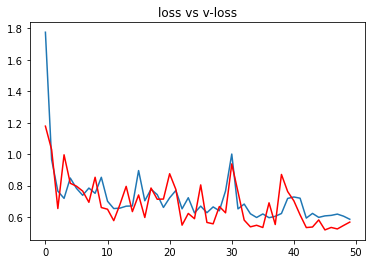

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# checking out the accurscy of our model

acc = resnetmodel.evaluate_generator(generator= pdtest_imgs)[1]

print(f"The accuracy of your model is = {acc*100} %")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


The accuracy of your model is = 70.243901014328 %


In [ ]:
## having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
#es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="x_best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [mc]

In [ ]:
hist = xnet_model.fit_generator(pdtrain_imgs,
                           steps_per_epoch= 16,
                           epochs= 50,
                           validation_data= pdval_imgs,
                           validation_steps= 4,
                           callbacks=[mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 3.4968 - accuracy: 0.4918
Epoch 1: val_accuracy improved from -inf to 0.65625, saving model to x_best_model.h5
16/16 [==============================] - 16s 741ms/step - loss: 3.4968 - accuracy: 0.4918 - val_loss: 1.9659 - val_accuracy: 0.6562
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 2.1475 - accuracy: 0.5943
Epoch 2: val_accuracy did not improve from 0.65625
16/16 [==============================] - 10s 632ms/step - loss: 2.1475 - accuracy: 0.5943 - val_loss: 2.2110 - val_accuracy: 0.4609
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 1.4036 - accuracy: 0.6988
Epoch 3: val_accuracy improved from 0.65625 to 0.74219, saving model to x_best_model.h5
16/16 [==============================] - 11s 660ms/step - loss: 1.4036 - accuracy: 0.6988 - val_loss: 0.9006 - val_accuracy: 0.7422
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 0.9000 - accuracy: 0.6934
Epoc

In [ ]:
# Loading the best fit model
from keras.models import load_model
xnet_base_model = load_model("/content/x_best_model.h5")

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

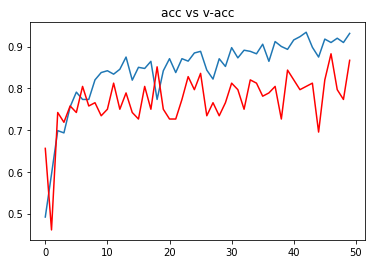

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

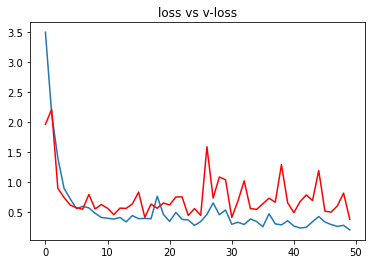

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# checking out the accurscy of our model

acc = xnet_base_model.evaluate_generator(generator= pdtest_imgs)[1]

print(f"The accuracy of your model is = {acc*100} %")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


The accuracy of your model is = 89.75609540939331 %


In [ ]:
## having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
#es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="v_best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [mc]

In [ ]:
hist = vgg_16_model.fit_generator(pdtrain_imgs,
                           steps_per_epoch= 16,
                           epochs= 50,
                           validation_data= pdval_imgs,
                           validation_steps= 4,
                           callbacks=[mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 0.7492 - accuracy: 0.5451
Epoch 1: val_accuracy improved from -inf to 0.60938, saving model to v_best_model.h5
16/16 [==============================] - 16s 716ms/step - loss: 0.7492 - accuracy: 0.5451 - val_loss: 0.8325 - val_accuracy: 0.6094
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 0.6539 - accuracy: 0.6445
Epoch 2: val_accuracy improved from 0.60938 to 0.78906, saving model to v_best_model.h5
16/16 [==============================] - 10s 646ms/step - loss: 0.6539 - accuracy: 0.6445 - val_loss: 0.5382 - val_accuracy: 0.7891
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 0.5869 - accuracy: 0.6947
Epoch 3: val_accuracy did not improve from 0.78906
16/16 [==============================] - 10s 616ms/step - loss: 0.5869 - accuracy: 0.6947 - val_loss: 0.5383 - val_accuracy: 0.7188
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 0.5291 - accuracy: 0.7316
Epoc

In [ ]:
# Loading the best fit model
from keras.models import load_model
vgg_base_model = load_model("/content/v_best_model.h5")

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

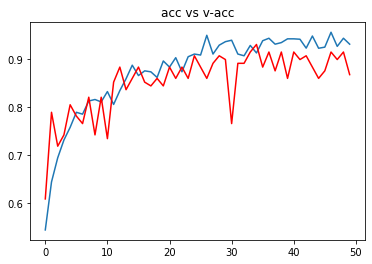

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

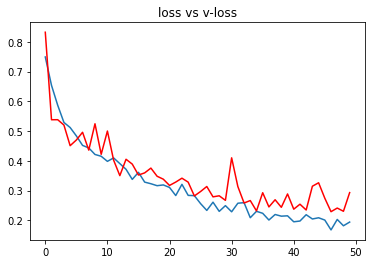

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# checking out the accurscy of our model

acc = vgg_base_model.evaluate_generator(generator= pdtest_imgs)[1]

print(f"The accuracy of your model is = {acc*100} %")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


The accuracy of your model is = 88.78048658370972 %


The MRI image is of nosurgery


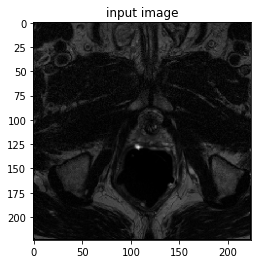

In [ ]:
# path for the image to see if it predics correct class

path = "/content/PDTest/No_Surgery/000208.dcm.png"
img = image.load_img(path, target_size=(224,224) )

i = image.img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(mobilenet_model.predict(input_arr))


if pred == 0:
  print("The MRI image is of nosurgery")
else:
  print("The MRI image is of surgery")


# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [ ]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 18.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt
import SimpleITK as sitk
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors

In [ ]:
def read_kImage(path):
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(path)
    # Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,y,x
    ct_scan = sitk.GetArrayFromImage(itkimage)
    return ct_scan

In [ ]:
img = read_kImage("/content/28aa17ab-b873-49a2-9584-b9644ed2db23.dcm")

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img.shape

(1, 128, 128)

In [ ]:
from IPython.display import Image\

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
img = img[0,:,:]
img.shape

(128, 128)

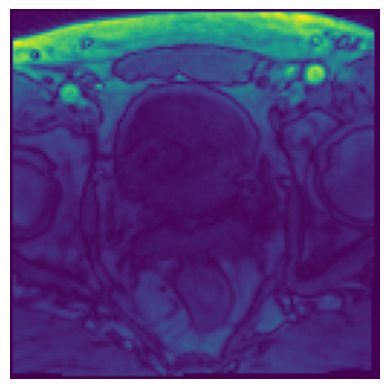

In [ ]:
plt.imshow(img)
plt.axis("off")
plt.show()